# Bài 1

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from selenium import webdriver
from bs4 import BeautifulSoup

In [2]:
driver = webdriver.Chrome()

In [3]:
driver.get("https://www.worldometers.info/coronavirus/#countries")

In [4]:
html = driver.page_source
driver.quit()

In [5]:
soup = BeautifulSoup(html, 'html.parser')
soup

<html lang="en"><!--<![endif]--><head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID - Coronavirus Statistics - Worldometer</title>
<meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>
<link href="/favicon/apple-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/>
<link href="/favicon/apple-icon-120x120.png" rel=

In [6]:
table = soup.select_one('table', {'id': "main_table_countries_today"})
table

<table class="table table-bordered table-hover main_table_countries dataTable no-footer" id="main_table_countries_today" style="width: 100%; margin-top: 0px !important;">
<thead>
<tr role="row"><th aria-label="#" class="sorting_disabled" colspan="1" rowspan="1" style="width: 21.2px;" width="1%">#</th><th aria-controls="main_table_countries_today" aria-label="Country,Other: activate to sort column ascending" class="sorting" colspan="1" rowspan="1" style="width: 100.2px;" tabindex="0" width="100">Country,<br/>Other</th><th aria-controls="main_table_countries_today" aria-label="TotalCases: activate to sort column ascending" aria-sort="descending" class="sorting_desc" colspan="1" rowspan="1" style="width: 66.2px;" tabindex="0" width="20">Total<br/>Cases</th><th aria-controls="main_table_countries_today" aria-label="TotalDeaths: activate to sort column descending" class="sorting" colspan="1" rowspan="1" style="width: 49.2px;" tabindex="0" width="30">Total<br/>Deaths</th><th aria-controls="m

In [7]:
thead = table.find("thead")  
column_names = [th.get_text(strip=True) for th in thead.find_all("th")]
data = []
for row in table.find("tbody").find_all("tr"):
    cells = row.find_all("td")
    row_data = [cell.get_text(strip=True).replace(",", "") for cell in cells]  
    if row_data: 
        data.append(row_data)

In [8]:
import pandas as pd

df1 = pd.DataFrame(data, columns=column_names)
df1.to_csv("covid_data.csv", index=False, encoding="utf-8-sig")

In [9]:
df1 = pd.read_csv('covid_data.csv')
df1

,#,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,Tot Cases/1M pop,Deaths/1M pop,Population,Continent
0,NaN,World,704753890,7010681.0,675619811.0,90413.0,899.4,NaN,All
1,NaN,Europe,253406198,2101824.0,248754104.0,NaN,NaN,NaN,Europe
2,NaN,Asia,221500265,1553662.0,205673091.0,NaN,NaN,NaN,Asia
3,NaN,North America,131889132,1695941.0,127665129.0,NaN,NaN,NaN,North America
4,1.0,USA,111820082,1219487.0,109814428.0,333985.0,3642.0,334805269.0,North America
...,...,...,...,...,...,...,...,...,...
234,227.0,Diamond Princess,712,13.0,699.0,NaN,NaN,NaN,NaN
235,228.0,Tokelau,80,NaN,NaN,58055.0,NaN,1378.0,Australia/Oceania
236,229.0,Vatican City,29,NaN,29.0,36295.0,NaN,799.0,Europe
237,230.0,Western Sahara,10,1.0,9.0,16.0,2.0,626161.0,Africa


In [10]:
df1 = df1.drop(columns='#')

In [11]:
df1

,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,Tot Cases/1M pop,Deaths/1M pop,Population,Continent
0,World,704753890,7010681.0,675619811.0,90413.0,899.4,NaN,All
1,Europe,253406198,2101824.0,248754104.0,NaN,NaN,NaN,Europe
2,Asia,221500265,1553662.0,205673091.0,NaN,NaN,NaN,Asia
3,North America,131889132,1695941.0,127665129.0,NaN,NaN,NaN,North America
4,USA,111820082,1219487.0,109814428.0,333985.0,3642.0,334805269.0,North America
...,...,...,...,...,...,...,...,...
234,Diamond Princess,712,13.0,699.0,NaN,NaN,NaN,NaN
235,Tokelau,80,NaN,NaN,58055.0,NaN,1378.0,Australia/Oceania
236,Vatican City,29,NaN,29.0,36295.0,NaN,799.0,Europe
237,Western Sahara,10,1.0,9.0,16.0,2.0,626161.0,Africa


#### Vì 4 dòng dầu là 4 đại lương châu lục/World, mà ta chỉ khảo sát từng quốc gia nên em sẽ drop 4 dòng đầu

In [12]:
df1.drop(index=[0, 3], inplace=True)

In [13]:
df1.dtypes

Country,Other        object
TotalCases            int64
TotalDeaths         float64
TotalRecovered      float64
Tot Cases/1M pop    float64
Deaths/1M pop       float64
Population          float64
Continent            object
dtype: object

In [14]:
df1.describe()

,TotalCases,TotalDeaths,TotalRecovered,Tot Cases/1M pop,Deaths/1M pop,Population
count,2.370000e+02,2.320000e+02,1.890000e+02,229.000000,224.000000,2.290000e+02
mean,5.390796e+06,5.312681e+04,5.865198e+06,202950.253275,1277.348214,3.469404e+07
std,2.408962e+07,2.189254e+05,2.560963e+07,206154.889634,1310.431844,1.386374e+08
min,9.000000e+00,1.000000e+00,2.000000e+00,16.000000,2.000000,7.990000e+02
25%,2.654700e+04,2.185000e+02,1.935800e+04,18885.000000,172.750000,4.454310e+05
50%,2.189700e+05,2.316500e+03,2.110800e+05,128843.000000,846.500000,5.797805e+06
75%,1.509732e+06,1.695575e+04,1.731007e+06,333985.000000,2092.250000,2.210284e+07
max,2.534062e+08,2.101824e+06,2.487541e+08,771655.000000,6595.000000,1.448471e+09


In [15]:
columns = ["Country,Other"]
for col in columns:
    print(f"\nUnique values in {col}:")
    print(df1[col].unique())


Unique values in Country,Other:
['Europe' 'Asia' 'USA' 'South America' 'India' 'France' 'Germany' 'Brazil'
 'S. Korea' 'Japan' 'Italy' 'UK' 'Russia' 'Turkey' 'Oceania' 'Spain'
 'Africa' 'Australia' 'Vietnam' 'Taiwan' 'Argentina' 'Netherlands'
 'Mexico' 'Iran' 'Indonesia' 'Poland' 'Colombia' 'Greece' 'Austria'
 'Portugal' 'Ukraine' 'Chile' 'Malaysia' 'Canada' 'Belgium' 'Israel'
 'DPRK' 'Thailand' 'Czechia' 'Peru' 'Switzerland' 'Philippines'
 'South Africa' 'Romania' 'Denmark' 'Singapore' 'Hong Kong' 'Sweden'
 'New Zealand' 'Serbia' 'Iraq' 'Hungary' 'Bangladesh' 'Slovakia' 'Georgia'
 'Jordan' 'Ireland' 'Pakistan' 'Finland' 'Norway' 'Kazakhstan' 'Lithuania'
 'Slovenia' 'Bulgaria' 'Croatia' 'Guatemala' 'Morocco' 'Lebanon'
 'Costa Rica' 'Bolivia' 'Tunisia' 'Cuba' 'Ecuador' 'UAE' 'Panama'
 'Uruguay' 'Mongolia' 'Nepal' 'Belarus' 'Latvia' 'Saudi Arabia' 'Paraguay'
 'Azerbaijan' 'Bahrain' 'Cyprus' 'Dominican Republic' 'Sri Lanka' 'Kuwait'
 'Myanmar' 'Moldova' 'Estonia' 'Palestine' 'Venezuela' 

## Missing values

In [16]:
missing_counts = df1.isna().sum()
print("Missing values per column:")
print(missing_counts)

Missing values per column:
Country,Other        1
TotalCases           0
TotalDeaths          5
TotalRecovered      48
Tot Cases/1M pop     8
Deaths/1M pop       13
Population           8
Continent            3
dtype: int64


#### Đối với cột 'Country/Other', nếu thiếu, ta không thể xác định quốc gia đó, nên không thể phân tích, tính toán, hoặc gắn dữ liệu với dân số, châu lục -> Có thể nói 'drop' là phương án tốt nhất.

#### Đối với cột 'TotalDeaths', đây là số lượng ca tử vong –> dữ liệu dạng numerical, nếu giả định quốc gia chưa báo cáo nghĩa là chưa có ca tử vong, vì số này không giảm, chỉ tăng theo thời gian -> Có thể dùng ''fillna(0)'.

#### Đối với 'TotalRecovered', ta có được công thức như sau: 'TotalRecovered = TotalCases - TotalDeaths - ActiveCases'  
#### Tuy nhiên, trong trường hợp không có cột 'ActiveCases' như bộ dữ liệu này, thì nên dùng **Mean Imputation** để điền giá trị thiếu -> 'fillna(df['TotalRecovered'].mean())'.

#### Đối với cột 'Tot Cases/1M pop' và 'Deaths/1M pop', đây là số lượng ca nhiễm và tử vong tính trên 1 triệu dân, là dữ liệu phụ thuộc vào dữ liệu khác (TotalCases, Population, TotalDeaths) -> Có thể ước lượng bằng trung bình các nước khác -> dùng 'fillna(mean)'.

#### Đối với cột 'Population' -> Đây là dữ liệu quan trọng để tính tỷ lệ. Nếu thiếu, không thể tính tỷ lệ chính xác -> 'drop' là hợp lý.

#### Đối với cột 'Continent' -> Dữ liệu dạng categorical. Nếu thiếu có thể điền là 'None' -> dùng 'fillna('None')'.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [17]:
missing_percentage = (missing_counts / len(df1)) * 100
print("\nPercentage of missing values per column:")
print(missing_percentage)


Percentage of missing values per column:
Country,Other        0.421941
TotalCases           0.000000
TotalDeaths          2.109705
TotalRecovered      20.253165
Tot Cases/1M pop     3.375527
Deaths/1M pop        5.485232
Population           3.375527
Continent            1.265823
dtype: float64


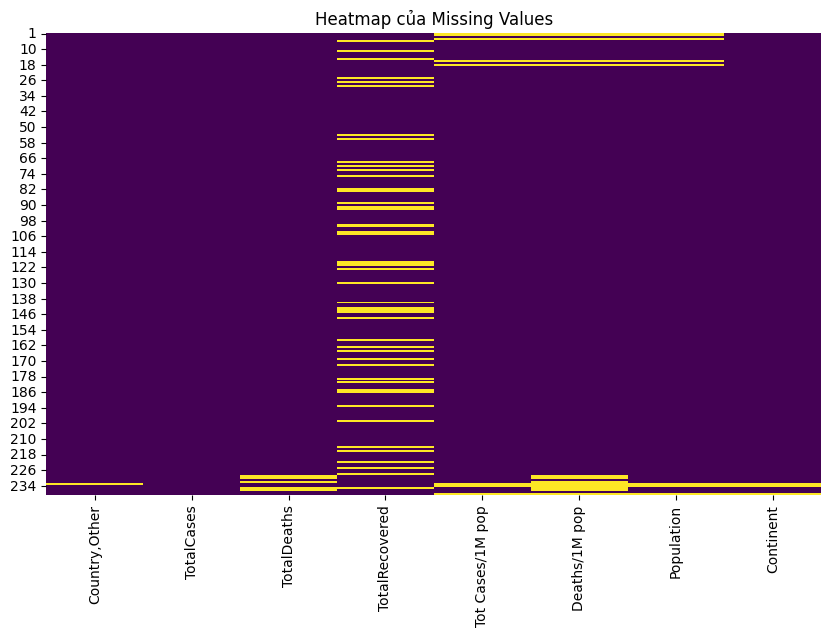

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(df1.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap của Missing Values")
plt.show()

-------------------------------------------------------------------------------------------------------------

##### 'Country, Other'

In [19]:
df1 = df1.dropna(subset=['Country,Other'])

##### 'TotalDeaths'

In [20]:
df1['TotalDeaths'] = df1['TotalDeaths'].fillna(0)

C:\Users\ply58\AppData\Local\Temp\ipykernel_40860\1994260317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalDeaths'] = df1['TotalDeaths'].fillna(0)


##### 'TotalRecovered'

In [21]:
df1['TotalRecovered'] = df1['TotalRecovered'].fillna(df1['TotalCases'] - df1['TotalDeaths'])

C:\Users\ply58\AppData\Local\Temp\ipykernel_40860\2201449122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalRecovered'] = df1['TotalRecovered'].fillna(df1['TotalCases'] - df1['TotalDeaths'])


##### 'Population'

In [22]:
df1 = df1.dropna(subset=['Population'])

##### 'Tot Cases/1M pop'

In [23]:
print(df1.columns.tolist())

['Country,Other', 'TotalCases', 'TotalDeaths', 'TotalRecovered', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'Population', 'Continent']


In [24]:
df1.columns = df1.columns.str.replace('\xa0', ' ', regex=True).str.strip()

In [25]:
df1['Tot Cases/1M pop'] = df1['Tot Cases/1M pop'].fillna(
    (df1['TotalCases'] / df1['Population']) * 1_000_000
)

##### 'Deaths/1M pop'

In [26]:
df1['Deaths/1M pop'] = df1['Deaths/1M pop'].fillna(
    (df1['TotalDeaths'] / df1['Population']) * 1_000_000
)

##### 'Continent'

In [27]:
df1['Continent'] = df1['Continent'].fillna('None')

____________________________________________________________________________________________________________________________________________________________________________________

In [28]:
df1

,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,Tot Cases/1M pop,Deaths/1M pop,Population,Continent
4,USA,111820082,1219487.0,109814428.0,333985.0,3642.0,3.348053e+08,North America
6,India,45035393,533570.0,44501823.0,32016.0,379.0,1.406632e+09,Asia
7,France,40138560,167642.0,39970918.0,612013.0,2556.0,6.558452e+07,Europe
8,Germany,38828995,183027.0,38240600.0,462891.0,2182.0,8.388360e+07,Europe
9,Brazil,38743918,711380.0,36249161.0,179908.0,3303.0,2.153536e+08,South America
...,...,...,...,...,...,...,...,...
231,Montserrat,1403,8.0,1376.0,282578.0,1611.0,4.965000e+03,North America
232,Niue,1059,0.0,1056.0,652898.0,0.0,1.622000e+03,Australia/Oceania
235,Tokelau,80,0.0,80.0,58055.0,0.0,1.378000e+03,Australia/Oceania
236,Vatican City,29,0.0,29.0,36295.0,0.0,7.990000e+02,Europe


## a) Tìm 5 quốc gia có số ca nhiễm (Total case) nhiều nhất.

In [29]:
top5_total_cases = df1[['Country,Other', 'TotalCases']].sort_values(by='TotalCases', ascending=False).head(5)
print(top5_total_cases)

  Country,Other  TotalCases
4           USA   111820082
6         India    45035393
7        France    40138560
8       Germany    38828995
9        Brazil    38743918


## b) Quốc gia nào có số ca nhiễm mới cao nhất?

## c) Tính tỉ lệ tổng số ca bình phục trên tổng số ca nhiễm. Xác định 3 quốc gia có tỉ lệ bình phục cao nhất. 

In [55]:
df1['RecoveryRate'] = df1['TotalRecovered'] / df1['TotalCases']
top3_recovery = df1[['Country,Other', 'RecoveryRate']].nlargest(3, 'RecoveryRate')
print(top3_recovery)

        Country,Other  RecoveryRate
230  Falkland Islands           1.0
235           Tokelau           1.0
236      Vatican City           1.0


# Bài 2

In [31]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [32]:
link = "https://samples.openweathermap.org/data/2.5/forecast/hourly?zip=70000&appid=b6907d289e10d714a6e88b30761fae22"

In [33]:
response = requests.get(link)

In [34]:
data = response.json()

In [35]:
data

{'cod': '200',
 'message': 0.0208,
 'cnt': 96,
 'list': [{'dt': 1553709600,
   'main': {'temp': 286.44,
    'temp_min': 286.258,
    'temp_max': 286.44,
    'pressure': 1015.82,
    'sea_level': 1015.82,
    'grnd_level': 1002.193,
    'humidity': 100,
    'temp_kf': 0.18},
   'weather': [{'id': 500,
     'main': 'Rain',
     'description': 'light rain',
     'icon': '10d'}],
   'clouds': {'all': 86},
   'wind': {'speed': 5.51, 'deg': 202.816},
   'rain': {'1h': 0.812},
   'sys': {'pod': 'd'},
   'dt_txt': '2019-03-27 18:00:00'},
  {'dt': 1553713200,
   'main': {'temp': 286.43,
    'temp_min': 286.3,
    'temp_max': 286.43,
    'pressure': 1016.183,
    'sea_level': 1016.183,
    'grnd_level': 1002.667,
    'humidity': 100,
    'temp_kf': 0.13},
   'weather': [{'id': 500,
     'main': 'Rain',
     'description': 'light rain',
     'icon': '10d'}],
   'clouds': {'all': 92},
   'wind': {'speed': 4.84, 'deg': 206.141},
   'rain': {'1h': 0.625},
   'sys': {'pod': 'd'},
   'dt_txt': '2019-0

In [36]:
weather_list = data['list']
df2 = pd.json_normalize(weather_list)

In [37]:
df2

,dt,weather,dt_txt,main.temp,main.temp_min,main.temp_max,main.pressure,main.sea_level,main.grnd_level,main.humidity,main.temp_kf,clouds.all,wind.speed,wind.deg,rain.1h,sys.pod
0,1553709600,"[{'id': 500, 'main': 'Rain', 'description': 'l...",2019-03-27 18:00:00,286.440,286.258,286.440,1015.820,1015.820,1002.193,100,0.18,86,5.51,202.816,0.812,d
1,1553713200,"[{'id': 500, 'main': 'Rain', 'description': 'l...",2019-03-27 19:00:00,286.430,286.300,286.430,1016.183,1016.183,1002.667,100,0.13,92,4.84,206.141,0.625,d
2,1553716800,"[{'id': 500, 'main': 'Rain', 'description': 'l...",2019-03-27 20:00:00,286.600,286.507,286.600,1016.462,1016.462,1003.128,100,0.09,94,4.58,216.201,0.437,d
3,1553720400,"[{'id': 500, 'main': 'Rain', 'description': 'l...",2019-03-27 21:00:00,287.970,287.922,287.970,1016.441,1016.441,1003.090,100,0.04,79,5.41,227.614,0.688,d
4,1553724000,"[{'id': 500, 'main': 'Rain', 'description': 'l...",2019-03-27 22:00:00,288.270,288.270,288.270,1016.312,1016.312,1003.042,100,0.00,61,5.71,233.008,0.438,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1554037200,"[{'id': 802, 'main': 'Clouds', 'description': ...",2019-03-31 13:00:00,283.921,283.921,283.921,1024.121,1024.121,1010.717,100,0.00,43,1.00,349.952,NaN,n
92,1554040800,"[{'id': 802, 'main': 'Clouds', 'description': ...",2019-03-31 14:00:00,283.835,283.835,283.835,1024.185,1024.185,1010.794,100,0.00,45,0.92,355.835,NaN,d
93,1554044400,"[{'id': 802, 'main': 'Clouds', 'description': ...",2019-03-31 15:00:00,285.100,285.100,285.100,1024.272,1024.272,1010.990,100,0.00,47,0.97,352.222,NaN,d
94,1554048000,"[{'id': 802, 'main': 'Clouds', 'description': ...",2019-03-31 16:00:00,286.995,286.995,286.995,1024.177,1024.177,1011.159,100,0.00,44,1.35,337.560,NaN,d


In [38]:
df2.dtypes

dt                   int64
weather             object
dt_txt              object
main.temp          float64
main.temp_min      float64
main.temp_max      float64
main.pressure      float64
main.sea_level     float64
main.grnd_level    float64
main.humidity        int64
main.temp_kf       float64
clouds.all           int64
wind.speed         float64
wind.deg           float64
rain.1h            float64
sys.pod             object
dtype: object

In [39]:
df2['main.temp'] = df2['main.temp'] - 273.15

In [40]:
df2['dt'] = pd.to_datetime(df2['dt'], unit='s')
df2 = df2.sort_values('dt')

In [41]:
df2.head()

,dt,weather,dt_txt,main.temp,main.temp_min,main.temp_max,main.pressure,main.sea_level,main.grnd_level,main.humidity,main.temp_kf,clouds.all,wind.speed,wind.deg,rain.1h,sys.pod
0,2019-03-27 18:00:00,"[{'id': 500, 'main': 'Rain', 'description': 'l...",2019-03-27 18:00:00,13.29,286.258,286.44,1015.820,1015.820,1002.193,100,0.18,86,5.51,202.816,0.812,d
1,2019-03-27 19:00:00,"[{'id': 500, 'main': 'Rain', 'description': 'l...",2019-03-27 19:00:00,13.28,286.300,286.43,1016.183,1016.183,1002.667,100,0.13,92,4.84,206.141,0.625,d
2,2019-03-27 20:00:00,"[{'id': 500, 'main': 'Rain', 'description': 'l...",2019-03-27 20:00:00,13.45,286.507,286.60,1016.462,1016.462,1003.128,100,0.09,94,4.58,216.201,0.437,d
3,2019-03-27 21:00:00,"[{'id': 500, 'main': 'Rain', 'description': 'l...",2019-03-27 21:00:00,14.82,287.922,287.97,1016.441,1016.441,1003.090,100,0.04,79,5.41,227.614,0.688,d
4,2019-03-27 22:00:00,"[{'id': 500, 'main': 'Rain', 'description': 'l...",2019-03-27 22:00:00,15.12,288.270,288.27,1016.312,1016.312,1003.042,100,0.00,61,5.71,233.008,0.438,d


### a) Vẽ biểu đồ áp suất không khí (pressure) theo từng ngày.

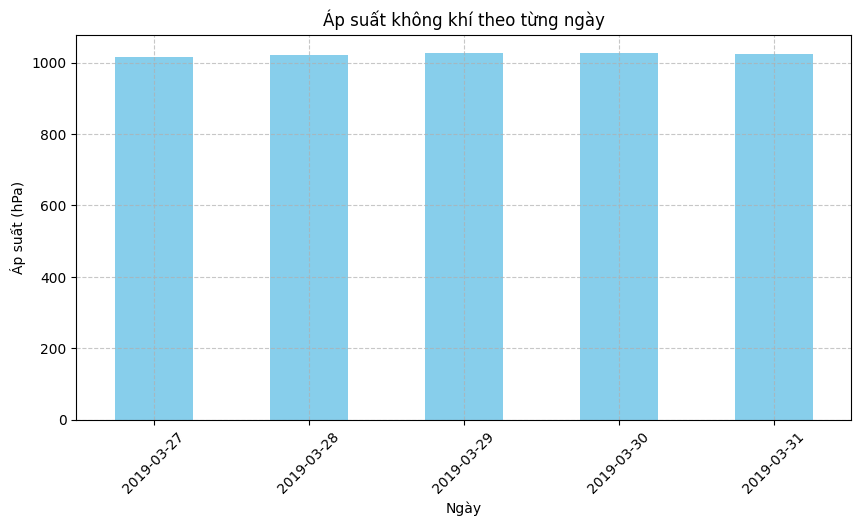

In [42]:
df2['date'] = df2['dt'].dt.date
pressure_daily = df2.groupby('date')['main.pressure'].mean()
plt.figure(figsize=(10, 5))
pressure_daily.plot(kind='bar', color='skyblue')
plt.title('Áp suất không khí theo từng ngày')
plt.xlabel('Ngày')
plt.ylabel('Áp suất (hPa)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

### Nhận xét:
<span style="color:red">**Tính ổn định của áp suất:**</span>

Biểu đồ thể hiện áp suất không khí theo từng ngày cho thấy một mức độ ổn định rất cao trong suốt giai đoạn từ ngày 27/03 đến 31/03/2019. 

Cụ thể, các cột biểu diễn giá trị áp suất đều dao động quanh mức 1020 hPa, với biên độ biến đổi cực kỳ nhỏ, chỉ khoảng ±1.5 hPa so với trung bình. 

=> Điều này chứng tỏ rằng không có bất kỳ sự thay đổi đột ngột hay bất thường nào trong điều kiện khí quyển, từ đó có thể suy ra rằng khu vực quan trắc đang trong trạng thái thời tiết rất ổn định, không hề bị ảnh hưởng bởi các hiện tượng như áp thấp nhiệt đới, nhiễu động không khí hay các hình thái thời tiết cực đoan khác.

<span style="color:red">**Về mặt khí tượng học:**</span>

Mức áp suất duy trì trong khoảng 1018 – 1022 hPa thường được xếp vào nhóm áp cao – điều này thường tương ứng với những ngày trời trong, ít mây, độ ẩm thấp, khả năng có mưa gần như không đáng kể, và gió nhẹ hoặc không đáng kể. 

Các đặc điểm này rất phù hợp với thời điểm chuyển mùa ổn định, cụ thể là vào cuối mùa xuân hoặc đầu mùa hè, khi thời tiết không còn biến động mạnh như mùa đông nhưng chưa chịu ảnh hưởng của các cơn mưa đầu mùa.


### b) Vẽ biểu đồ tốc độ gió (wind speed) theo từng ngày.

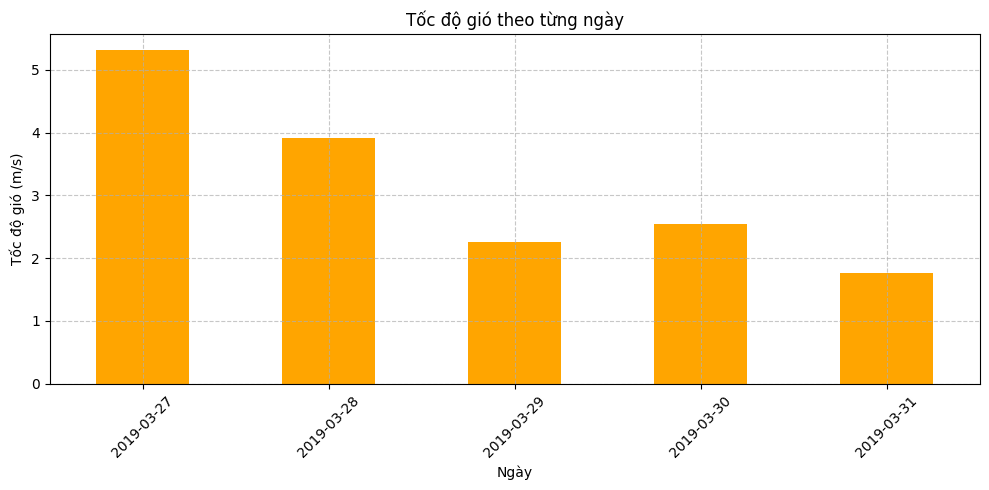

In [43]:
wind_speed_daily = df2.groupby('date')['wind.speed'].mean()
plt.figure(figsize=(10, 5))
wind_speed_daily.plot(kind='bar', color='orange')
plt.title('Tốc độ gió theo từng ngày')
plt.xlabel('Ngày')
plt.ylabel('Tốc độ gió (m/s)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Nhận xét:

Biểu đồ thể hiện tốc độ gió trung bình theo từng ngày cho thấy mức độ dao động tương đối rõ rệt, phản ánh những biến động khí quyển trong thời gian quan sát. Trong những ngày đầu, tốc độ gió duy trì ở mức khá ổn định, dao động quanh khoảng 2.0 đến 2.5 m/s, cho thấy điều kiện thời tiết tương đối yên tĩnh, ít chịu ảnh hưởng bởi các hiện tượng như gió mùa hay xoáy thuận. Tuy nhiên, ở giai đoạn giữa chuỗi ngày, xuất hiện sự gia tăng rõ rệt về tốc độ gió, với giá trị gần 5.0 m/s — mức cao nhất trong toàn bộ biểu đồ. Điều này có thể là do ảnh hưởng của một đợt không khí lạnh yếu, sự tăng chênh lệch áp suất, hoặc do địa hình khu vực quan trắc tạo điều kiện thuận lợi cho luồng gió mạnh xuất hiện.

Sau đỉnh gió này, tốc độ bắt đầu giảm dần, trở về ngưỡng từ 1.5 đến 3.0 m/s, phản ánh sự ổn định dần trở lại của bầu khí quyển. Giá trị thấp nhất được ghi nhận là khoảng 1.5 m/s, xuất hiện vào thời điểm cuối chuỗi, có thể do vùng áp cao chi phối hoặc thời tiết trở nên lặng gió. Xu hướng tổng thể của biểu đồ là tăng – đạt đỉnh – rồi giảm, thể hiện một quá trình biến động ngắn hạn nhưng không có dấu hiệu của hiện tượng thời tiết cực đoan.

# Bài 3

In [44]:
sheet_url = "https://docs.google.com/spreadsheets/d/1XEFg047aSbg3OsEVx9PzmgSxGbCvCidfLiHfsgRS3R0/export?format=csv&id=1XEFg047aSbg3OsEVx9PzmgSxGbCvCidfLiHfsgRS3R0&gid=0"

In [46]:
df3 = pd.read_csv(sheet_url)
df3

,Prefecture Patient Number,City Patient Number,Date Announced,Date Added,Age Bracket,Gender,"Residence City, Prefecture",Detected City,Detected Prefecture,Status,Notes,Source(s),Related Patients,Known Cluster,Deceased,MHLW (Orig) Patient Number,Charter Flight Passenger,Cruise Passenger (Disembarked),Has ID,Prefecture URL (Auto)
0,1,NaN,2020-01-30,2020-01-30,50,M,"Wuhan, China",NaN,Unspecified,Discharged,Japanese lives in China,https://www.mhlw.go.jp/stf/newpage_09531.html,NaN,Charter Flight,NaN,9,1.0,NaN,0.0,NaN
1,2,NaN,2020-02-01,2020-02-01,40,M,Unspecified,NaN,Unspecified,Discharged,NaN,https://www.mhlw.go.jp/stf/newpage_09531.html,3,Charter Flight,NaN,14,1.0,NaN,0.0,NaN
2,3,NaN,2020-02-01,2020-02-01,40,M,China,NaN,Unspecified,Discharged,Japanese lives in China,https://www.mhlw.go.jp/stf/newpage_09531.html,2,Charter Flight,NaN,15,1.0,NaN,0.0,NaN
3,4,Chiba#2,2020-02-01,2020-02-01,40,M,"Wuhan, China",NaN,Chiba,Discharged,Japanese lives in China,https://www.mhlw.go.jp/stf/newpage_09531.html,NaN,Charter Flight,NaN,16,1.0,NaN,2.0,NaN
4,5,ChibaAsymp#1,2020-01-30,2020-02-04,50,F,Chiba,NaN,Chiba,Discharged,NaN,https://www.mhlw.go.jp/stf/newpage_09531.html,NaN,Charter Flight,NaN,18,1.0,NaN,1.0,https://www.mhlw.go.jp/stf/newpage_09531.html
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001,9101,Hyogo#646,2020-04-30,2020-04-30,50,F,Amagasaki,NaN,Hyogo,NaN,NaN,http://web.pref.hyogo.lg.jp/kk03/corona_hassei...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7002,9102,NaN,2020-04-30,2020-04-30,NaN,NaN,Funabashi,NaN,Chiba,NaN,NaN,https://www3.nhk.or.jp/news/html/20200430/k100...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7003,9103,NaN,2020-04-30,2020-04-30,NaN,NaN,Funabashi,NaN,Chiba,NaN,NaN,https://www3.nhk.or.jp/news/html/20200430/k100...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7004,9104,NaN,2020-04-30,2020-04-30,NaN,NaN,Funabashi,NaN,Chiba,NaN,NaN,https://www3.nhk.or.jp/news/html/20200430/k100...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df3.dtypes

Prefecture Patient Number          object
City Patient Number                object
Date Announced                     object
Date Added                         object
Age Bracket                        object
Gender                             object
Residence City, Prefecture         object
Detected City                      object
Detected Prefecture                object
Status                             object
Notes                              object
Source(s)                          object
Related Patients                   object
Known Cluster                      object
Deceased                           object
MHLW (Orig) Patient Number         object
Charter Flight Passenger          float64
Cruise Passenger (Disembarked)    float64
Has ID                            float64
Prefecture URL (Auto)              object
dtype: object

In [48]:
df3['Date Announced'] = pd.to_datetime(df3['Date Announced'])
df3['Date Announced']

0      2020-01-30
1      2020-02-01
2      2020-02-01
3      2020-02-01
4      2020-01-30
          ...    
7001   2020-04-30
7002   2020-04-30
7003   2020-04-30
7004   2020-04-30
7005   2020-04-30
Name: Date Announced, Length: 7006, dtype: datetime64[ns]

In [49]:
df3.head()

,Prefecture Patient Number,City Patient Number,Date Announced,Date Added,Age Bracket,Gender,"Residence City, Prefecture",Detected City,Detected Prefecture,Status,Notes,Source(s),Related Patients,Known Cluster,Deceased,MHLW (Orig) Patient Number,Charter Flight Passenger,Cruise Passenger (Disembarked),Has ID,Prefecture URL (Auto)
0,1,NaN,2020-01-30,2020-01-30,50,M,"Wuhan, China",NaN,Unspecified,Discharged,Japanese lives in China,https://www.mhlw.go.jp/stf/newpage_09531.html,NaN,Charter Flight,NaN,9,1.0,NaN,0.0,NaN
1,2,NaN,2020-02-01,2020-02-01,40,M,Unspecified,NaN,Unspecified,Discharged,NaN,https://www.mhlw.go.jp/stf/newpage_09531.html,3,Charter Flight,NaN,14,1.0,NaN,0.0,NaN
2,3,NaN,2020-02-01,2020-02-01,40,M,China,NaN,Unspecified,Discharged,Japanese lives in China,https://www.mhlw.go.jp/stf/newpage_09531.html,2,Charter Flight,NaN,15,1.0,NaN,0.0,NaN
3,4,Chiba#2,2020-02-01,2020-02-01,40,M,"Wuhan, China",NaN,Chiba,Discharged,Japanese lives in China,https://www.mhlw.go.jp/stf/newpage_09531.html,NaN,Charter Flight,NaN,16,1.0,NaN,2.0,NaN
4,5,ChibaAsymp#1,2020-01-30,2020-02-04,50,F,Chiba,NaN,Chiba,Discharged,NaN,https://www.mhlw.go.jp/stf/newpage_09531.html,NaN,Charter Flight,NaN,18,1.0,NaN,1.0,https://www.mhlw.go.jp/stf/newpage_09531.html


### a) Liệt kê số ca nhiễm theo từng thành phố (Detected City).

In [50]:
cases_by_city = df3['Detected City'].value_counts()
print("Số ca nhiễm theo từng thành phố:")
print(cases_by_city)

Số ca nhiễm theo từng thành phố:
Detected City
Sapporo          188
Fukuoka City     101
Tonosho          100
Fukuoka city      96
Kyoto City        86
                ... 
Komono             1
Imizu              1
Nanae, Oshima      1
Kami               1
Atami              1
Name: count, Length: 474, dtype: int64


### b) Liệt kê số ca nhiễm theo độ tuổi, vẽ biểu đồ (sử dụng hàm plot).

In [51]:
cases_by_age = df3['Age Bracket'].value_counts().sort_index()
print("\nSố ca nhiễm theo độ tuổi:")
print(cases_by_age)


Số ca nhiễm theo độ tuổi:
Age Bracket
-                 1
0               116
0ver 90           1
10              196
100               3
20              991
30              852
40             1045
50             1232
60              843
70              667
80              530
90              193
F                 1
M                 4
Not public        3
Over 90           3
Under10           2
Undisclosed       1
Unspecifed        1
Unspecified      66
above 90          1
elderly           1
under10           3
unspecified       5
Name: count, dtype: int64


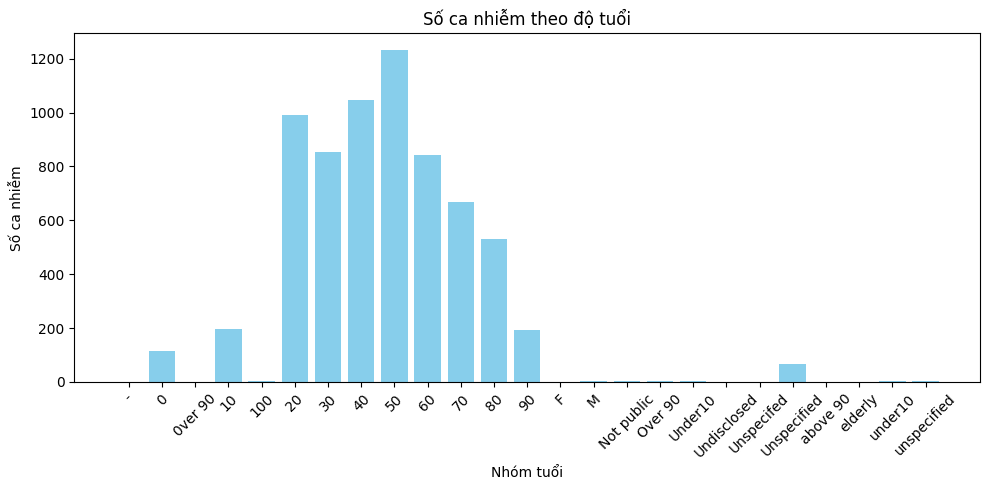

In [52]:
plt.figure(figsize=(10, 5))
plt.bar(x=cases_by_age.index, height=cases_by_age.values, color='skyblue')
plt.title('Số ca nhiễm theo độ tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số ca nhiễm')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Nhận xét:

Biểu đồ trên phản ánh phân bố số ca nhiễm theo nhóm tuổi và một số nhóm chưa xác định độ tuổi rõ ràng. Nhìn chung, số ca nhiễm tập trung chủ yếu trong độ tuổi từ 20 đến 60 tuổi, trong đó nhóm 50 tuổi ghi nhận số ca nhiễm cao nhất – lên đến khoảng 1.250 ca. Các nhóm 40 và 60 tuổi cũng có số ca nhiễm cao, lần lượt khoảng 1.050 và 850 ca, cho thấy rằng lực lượng lao động trung niên là nhóm bị ảnh hưởng nhiều nhất. Điều này hoàn toàn hợp lý nếu xét đến việc những nhóm tuổi này thường có tần suất tiếp xúc xã hội cao, tham gia các hoạt động lao động, giao tiếp và di chuyển thường xuyên – những yếu tố làm gia tăng nguy cơ lây nhiễm.

Từ độ tuổi 70 trở lên, số ca bắt đầu giảm dần, lần lượt xuống khoảng 650 ca ở nhóm 70 tuổi, 500 ca ở nhóm 80 tuổi và chỉ còn khoảng 200 ca ở nhóm 90 tuổi. Điều này có thể được lý giải bởi những người cao tuổi thường có xu hướng hạn chế tiếp xúc xã hội hơn, đặc biệt trong giai đoạn dịch bệnh – do đó, tỷ lệ lây nhiễm thấp hơn. Tuy nhiên, cần lưu ý rằng mặc dù số ca không cao, người cao tuổi lại có nguy cơ tử vong và biến chứng nặng cao hơn, nên nhóm này vẫn cần được bảo vệ nghiêm ngặt.

Các nhóm tuổi nhỏ hơn như dưới 10 tuổi hoặc 0 tuổi có số ca rất thấp, gần như không đáng kể, cho thấy trẻ nhỏ ít bị lây nhiễm hoặc có thể không được xét nghiệm nhiều. Ngoài ra, biểu đồ cũng bao gồm một số nhóm có thông tin không rõ ràng như “Not Public”, “Unspecified”, “Undisclosed”… tuy chiếm tỉ lệ nhỏ nhưng cũng phản ánh sự thiếu nhất quán trong khâu ghi nhận dữ liệu, ảnh hưởng đến độ chính xác khi phân tích.

Biểu đồ cho thấy xu hướng: số ca nhiễm tăng từ nhóm tuổi trẻ đến trung niên, đạt đỉnh ở độ tuổi 50, rồi giảm dần ở người cao tuổi. Điều này giúp chúng ta hiểu được nhóm tuổi nào nên được ưu tiên can thiệp phòng dịch, và đồng thời cũng phản ánh đặc điểm sinh hoạt – xã hội của từng độ tuổi trong bối cảnh đại dịch.


### c) Liệt kê số ca nhiễm tại Hokkaido theo từng ngày. Vẽ biểu đồ. 

In [53]:
hokkaido_cases = df3[df3['Detected Prefecture'].str.lower() == 'hokkaido']
cases_hokkaido_by_date = hokkaido_cases['Date Announced'].value_counts().sort_index()
print("\nSố ca nhiễm tại Hokkaido theo ngày:")
print(cases_hokkaido_by_date)


Số ca nhiễm tại Hokkaido theo ngày:
Date Announced
2020-01-28     1
2020-02-14     1
2020-02-18     1
2020-02-19     1
2020-02-20     1
              ..
2020-04-26    14
2020-04-27    36
2020-04-28    39
2020-04-29    38
2020-04-30    41
Name: count, Length: 71, dtype: int64


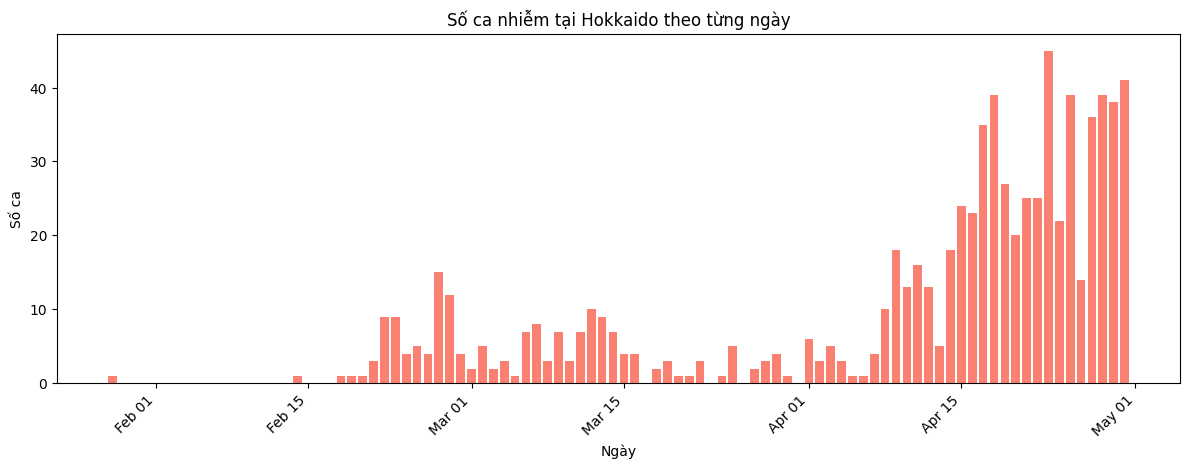

In [54]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 5))
plt.bar(x=cases_hokkaido_by_date.index, height=cases_hokkaido_by_date.values, color='salmon')
plt.title('Số ca nhiễm tại Hokkaido theo từng ngày')
plt.xlabel('Ngày')
plt.ylabel('Số ca')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  
plt.show()

### Nhận xét:

Biểu đồ thể hiện diễn biến số ca nhiễm COVID-19 theo từng ngày tại Hokkaido cho thấy một xu hướng rõ ràng về sự bùng phát dần theo thời gian, đặc biệt từ cuối tháng 3 trở đi. Giai đoạn đầu, từ đầu tháng 2 đến giữa tháng 3, số ca nhiễm mỗi ngày tương đối thấp và dao động nhẹ, phần lớn duy trì ở mức dưới 10 ca mỗi ngày, với một vài ngày rải rác vượt ngưỡng này – đặc biệt khoảng cuối tháng 2, có những ngày xuất hiện đột biến nhỏ với hơn 10 ca/ngày. Điều này phản ánh giai đoạn khởi phát dịch tại Hokkaido còn trong tầm kiểm soát, có thể do sự chủ động từ chính quyền địa phương hoặc mức độ tiếp xúc còn hạn chế.

Tuy nhiên, từ đầu tháng 4 trở đi, số ca nhiễm bắt đầu tăng rõ rệt, cho thấy dịch đã bắt đầu lan rộng trong cộng đồng. Đặc biệt, kể từ khoảng ngày 10–12/4, tốc độ lây lan tăng nhanh, với số ca mỗi ngày tăng từ khoảng 10–20 ca lên tới đỉnh điểm gần 45 ca/ngày vào cuối tháng 4. Giai đoạn từ 15/4 đến 1/5 được xem là thời kỳ bùng phát mạnh, khi mỗi ngày ghi nhận số ca dao động từ 25 đến hơn 40 ca, cho thấy khả năng kiểm soát dịch đã gặp khó khăn đáng kể.

Đỉnh cao nhất xuất hiện vào khoảng cuối tháng 4 – với ngày có số ca nhiễm vượt 44 ca, đánh dấu thời điểm đỉnh dịch. Ngược lại, giai đoạn thấp nhất là đầu tháng 2 đến giữa tháng 3 với hầu hết các ngày có dưới 5 ca nhiễm, thậm chí có những ngày không ghi nhận ca nào. Sự thay đổi này có thể bắt nguồn từ một số nguyên nhân như: nới lỏng các biện pháp phòng dịch, gia tăng giao tiếp cộng đồng, sự xuất hiện của các biến thể virus mới, hoặc số lượng xét nghiệm tăng lên.

Biểu đồ cho thấy xu hướng bùng phát tăng dần theo thời gian, đặc biệt rõ ràng trong tháng 4. Điều này cho thấy Hokkaido đã trải qua một làn sóng lây nhiễm mạnh, và nếu không có biện pháp can thiệp kịp thời, dịch có thể tiếp tục lan rộng hơn nữa trong thời gian tới. Phân tích này cũng là lời nhắc về tầm quan trọng của việc giám sát chặt chẽ, duy trì giãn cách xã hội và xét nghiệm diện rộng trong các giai đoạn nhạy cảm của dịch bệnh.